# **White Blood Cell Classification using CNN Model**

#### **Firstly we will import all the required Libraries** 

In [75]:
import os
# Libraries for loading Data and Exploring data
import pandas as pd
import numpy as np
# Libraries for Visualizations
import seaborn as sns
import PIL as pil 
import cv2
import matplotlib.pyplot as plt 

# Libraries for Deep learning Model

from sklearn.manifold import TSNE
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.utils import to_categorical

**Now,**

#### I am going to create our dataset for **CNN Model** for that we will convert images into numeric form and create a dataframe using Pandas 

#### we will be resizing all images to **64 x 64 size** 


In [76]:
data_path = r"bloodcellimg"

labels_ = os.listdir(data_path) 


images_data = []
lab = []

for label in labels_:
    path = os.path.join(data_path, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array_1 = cv2.resize(img_array,(64,64))
        lab.append(label)
        images_data.append(img_array_1)

### **Remember**, the Images are in Numeric Form and Now we are going to work with that Data  

In [77]:
labels_

['basophil',
 'eosinophil',
 'erythroblast',
 'ig',
 'lymphocyte',
 'monocyte',
 'neutrophil',
 'platelet']

Let us get a look at an image from each Folder

Cell Name:  Basophil


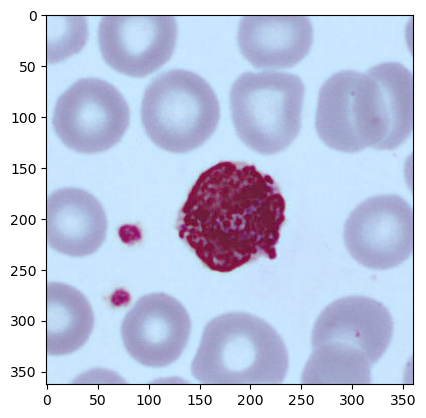


Cell Name:  Eosinophil


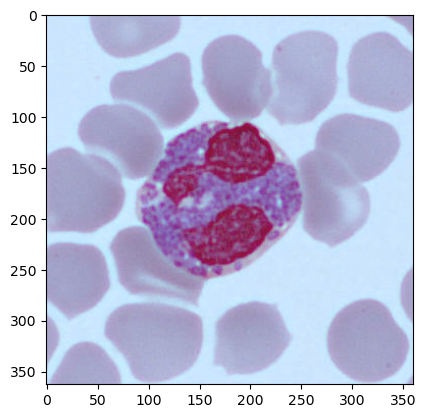


Cell Name:  Erythroblast


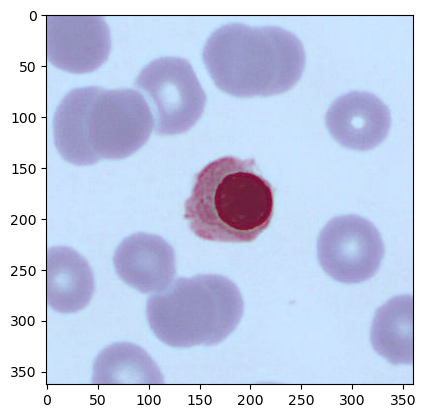


Cell Name:  Ig


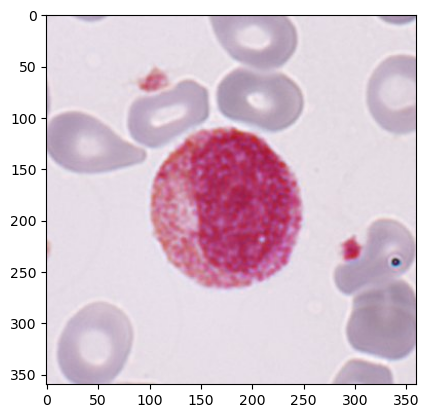


Cell Name:  Lymphocyte


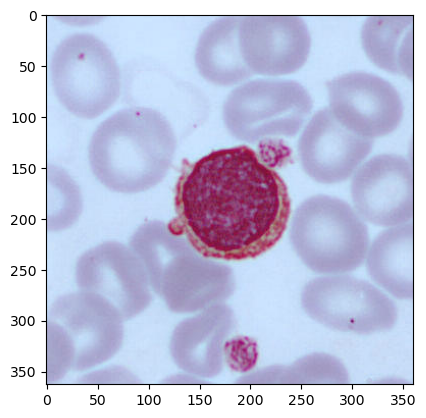


Cell Name:  Monocyte


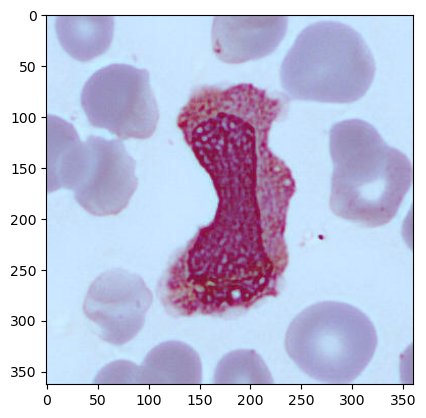


Cell Name:  Neutrophil


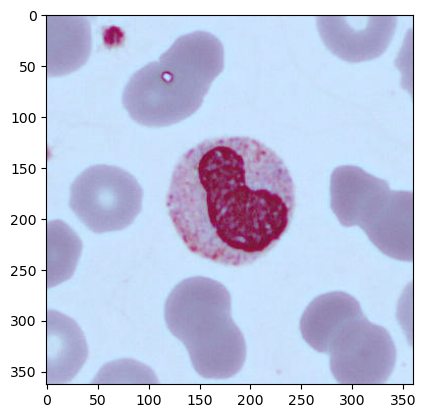


Cell Name:  Platelet


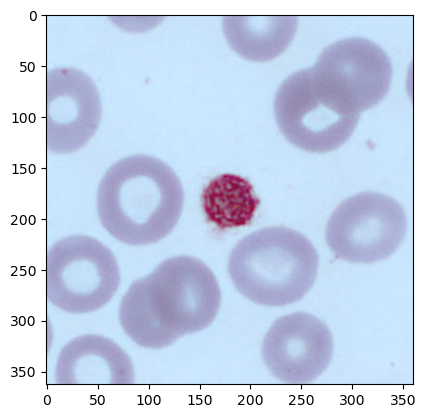

In [78]:
for label in labels_:
    path = os.path.join(data_path, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        print("Cell Name: ",label.title())
        plt.imshow(img_array)
        plt.show()
        print("")
        break
    

Now Let us Normalize the image arrays

In [79]:
images_data = np.squeeze(images_data)

images_data.shape

(17092, 64, 64, 3)

In [80]:
images_data = images_data.astype("float32")

images_data /= 255 


In [81]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
enc_lab = encoder.fit_transform(lab)

print("Encoded Labels")
set(enc_lab)

Encoded Labels


{0, 1, 2, 3, 4, 5, 6, 7}

In [82]:
no_of_classes = len(set(enc_lab))


In [83]:
lab = to_categorical(enc_lab , num_classes = no_of_classes)

lab[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Now let's split the data into**

1. **Training Data**

2. **Testing Data** 

In [84]:
# Now we will split data using train test split function keeping the test size of 30%

from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(images_data , lab , test_size=0.1 )


#### **Now building the CNN Model for Classification**

In [85]:
# Define the model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64,64,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(8, activation='softmax'))



### **Compiling the Model**

In [86]:
# Compile the model with SparseCategoricalCrossentropy loss and the Adam optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### **Model Summary**

View all the layers of the network using the `Model.summary` method:

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 8192)             

### **Building the CNN Model**

In [88]:
epochs=25
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  verbose = 1
)

Epoch 1/25
481/481 [==============================] - 80s 155ms/step - loss: 1.1347 - accuracy: 0.5687
Epoch 2/25
481/481 [==============================] - 65s 136ms/step - loss: 0.6692 - accuracy: 0.7554
Epoch 3/25
481/481 [==============================] - 60s 125ms/step - loss: 0.5334 - accuracy: 0.8081
Epoch 4/25
481/481 [==============================] - 64s 134ms/step - loss: 0.4038 - accuracy: 0.8570
Epoch 5/25
481/481 [==============================] - 60s 125ms/step - loss: 0.3381 - accuracy: 0.8796
Epoch 6/25
481/481 [==============================] - 60s 124ms/step - loss: 0.2856 - accuracy: 0.9002
Epoch 7/25
481/481 [==============================] - 61s 127ms/step - loss: 0.2459 - accuracy: 0.9128
Epoch 8/25
481/481 [==============================] - 62s 130ms/step - loss: 0.2128 - accuracy: 0.9255
Epoch 9/25
481/481 [==============================] - 60s 125ms/step - loss: 0.1889 - accuracy: 0.9356
Epoch 10/25
481/481 [==============================] - 60s 125ms/step - l

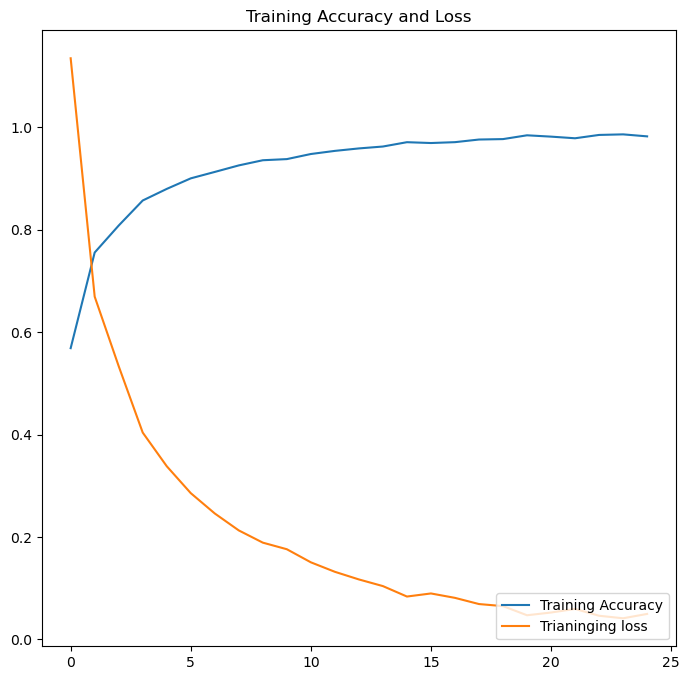

In [89]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Trianinging loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

plt.show()

#### **Now Exporting Our Model and Predicting the Test Data with it**

In [90]:
#
# Now we are exporting our model and will be
# Testing our model against the TestData 
# 

# Define a path to save the model
model_path = r"Classification of Cell"

# Save the TensorFlow model in the SavedModel format
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: Classification of Cell\assets


INFO:tensorflow:Assets written to: Classification of Cell\assets


In [ ]:

# Loading the saved TensorFlow model
loaded_tf_model = tf.saved_model.load("Classification of Cell")

# **Remember** 

**Now, as we know that we are Developing a White Blood Cell Classification Model and We have 8 type of Cell Images**

**From Which Below 5 are White Blood Cell Type and Other are Not**

1. basophil
2. eosinophil
3. lymphocyte
4. monocyte
5. neutrophil


**So, Now the Model will predict on Test Data if the Cell Image belong to White blood cell or Not**

### **Note: In brackets is the True Cell Type and before bracket is the Predicted Type**

54/54 [==============================] - 17s 236ms/step
1 = White Blood Cell and 0 = Not White Blood Cell


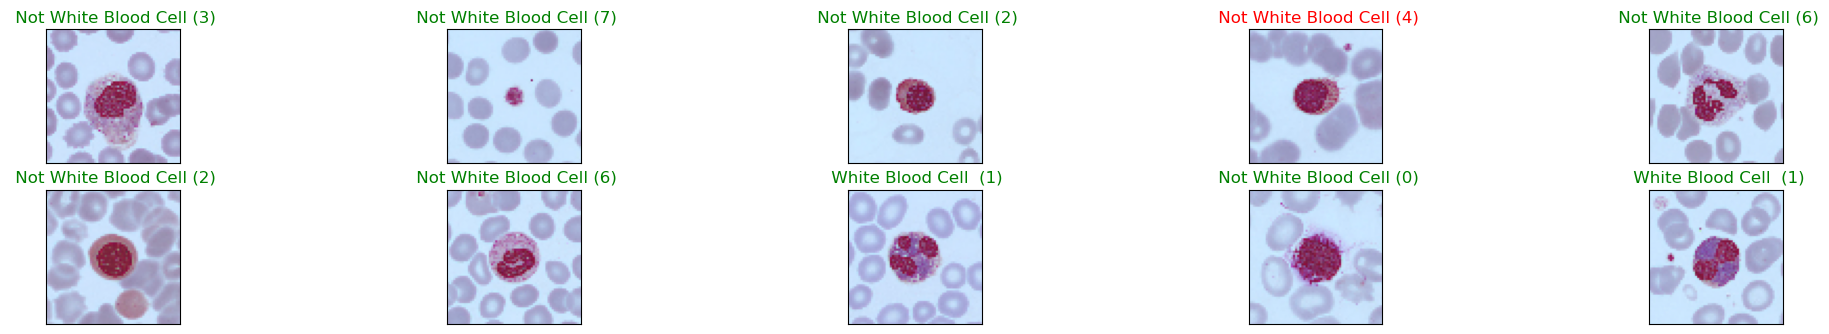

In [91]:
y_hat = model.predict(x_test)

labels = list(set(enc_lab))

# Plot a random sample of 10 test images, their predicted labels and True Labels 
# and then we can see how accurate our Model is working 
figure = plt.figure(figsize=(25, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format("\nWhite Blood Cell\n" if labels[predict_index] == 1 else "Not White Blood Cell", 
                                  "\nWhite Blood Cell\n" if labels[true_index] == 1 else "Not White Blood Cell"),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()



#### So, Looking into the above result we can say our Model is Working Perfectly and can be used for **White Blood Cell Classifications**